# Tracking amoeba

In [7]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import simple_snake_new as sis
%matplotlib qt

## Investigate data

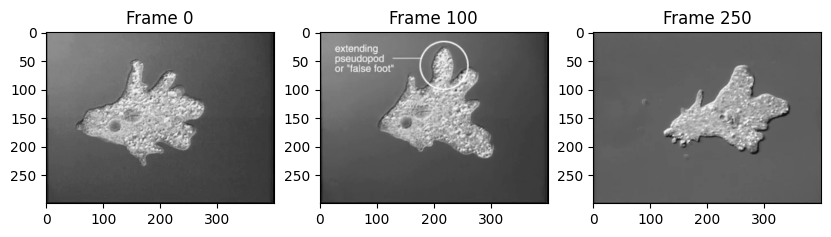

In [8]:
filename = '../data/week6/crawling_amoeba.mov'
vid = imageio.get_reader(filename)
movie = np.array([im for im in vid.iter_data()], dtype=float)/255
movie = movie.mean(axis=3)

samples = [0, 100, 250]
fig, ax = plt.subplots(1, len(samples), figsize=(10, 3))
for s, a in zip(samples, ax):
    a.imshow(movie[s],cmap='gray')
    a.set_title(f'Frame {s}')
plt.show()

## Initialize snake

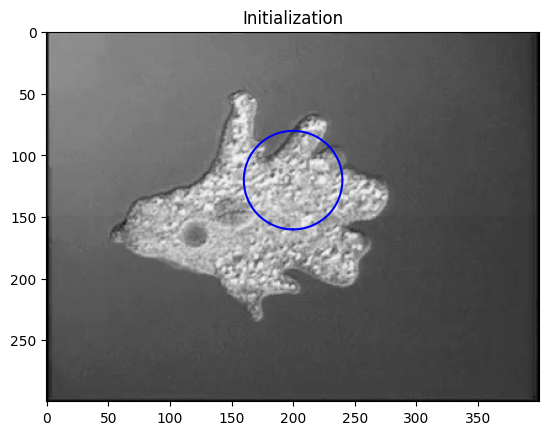

In [9]:
#%% settings
nr_points = 100
step_size = 10
alpha = 0.02
beta = 0.02
center = (120, 200)
radius = 40

#%% initialization
snake = sis.make_circular_snake(nr_points, center, radius)
B = sis.regularization_matrix(nr_points, alpha, beta)
frame = movie[0]
fig, ax = plt.subplots()
ax.imshow(frame, cmap='gray')
closed = np.hstack([np.arange(nr_points), 0])  # Indices of the closed curve
ax.plot(snake[closed, 1], snake[closed, 0], 'b-')
ax.set_title('Initialization')
plt.show()

## Segment amoeba in the first frame

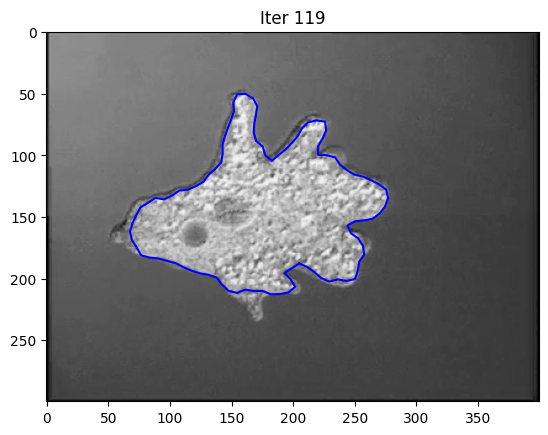

In [10]:
fig, ax = plt.subplots()
for i in range(120):    
    snake = sis.evolve_snake(snake, frame, B, step_size)    
    ax.clear()
    ax.imshow(frame, cmap='gray')
    ax.plot(snake[closed, 1], snake[closed, 0], 'b-')
    ax.set_title(f'Iter {i}')
    plt.pause(0.001)
plt.show()

## Track amoeba

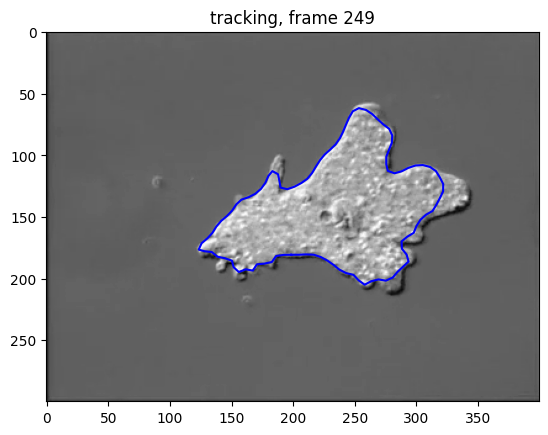

In [11]:
fig, ax = plt.subplots()
for i in range(250):
    frame = movie[i] 
    snake = sis.evolve_snake(snake, frame, B, step_size)    
    ax.clear()
    ax.imshow(frame, cmap='gray')
    ax.plot(snake[closed, 1], snake[closed, 0], 'b-')
    ax.set_title(f'tracking, frame {i}')
    plt.pause(0.001)
plt.show()
